In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
mnist = keras.datasets.mnist

In [2]:
import tensorflow as tf

In [3]:
(X_train_full,y_train_full), (X_test,y_test) = mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train,X_valid = X_train_full[:50000]/255.0,X_train_full[50000:]/255.0 # we normalizing the pixel values btw 0 and 1
y_train,y_valid= y_train_full[:50000],y_train_full[50000:]

In [6]:
X_train.shape

(50000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

#### Model using Sequential API

In [8]:
model = keras.models.Sequential([
    (keras.layers.Flatten(input_shape = [28,28])),
    (keras.layers.Dense(100,activation='relu')),
    (keras.layers.Dense(100,activation='relu')),
    (keras.layers.Dense(10,activation='softmax'))
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=30,validation_data=[X_valid,y_valid])

Epoch 1/30
1563/1563 [==============================] - 6s 3ms/step - loss: 0.7513 - accuracy: 0.8051 - val_loss: 0.3351 - val_accuracy: 0.9059
Epoch 2/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3258 - accuracy: 0.9076 - val_loss: 0.2671 - val_accuracy: 0.9231
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2724 - accuracy: 0.9222 - val_loss: 0.2374 - val_accuracy: 0.9335
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2370 - accuracy: 0.9317 - val_loss: 0.2067 - val_accuracy: 0.9433
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2094 - accuracy: 0.9395 - val_loss: 0.1851 - val_accuracy: 0.9491
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1879 - accuracy: 0.9462 - val_loss: 0.1692 - val_accuracy: 0.9525
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1705 - accuracy: 0.9505 - val_loss: 0.1596 - val_accuracy:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

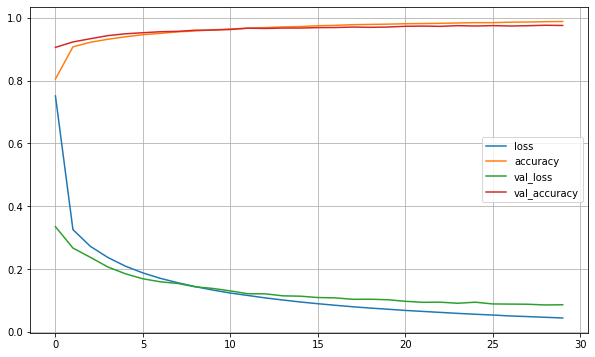

In [13]:
pd.DataFrame(history.history).plot(figsize = (10,6))
plt.grid()
plt.show()

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 15.0079 - accuracy: 0.9731


[15.00793170928955, 0.9731000065803528]

In [16]:
import numpy as np

In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_pred_classes = np.argmax(y_pred,axis=1)

In [21]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

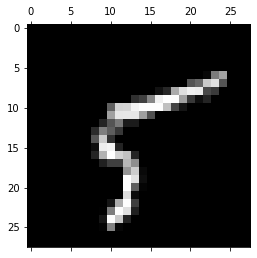

In [22]:
image = X_test[59]
plt.matshow(image,cmap = 'gray')
plt.show()

In [23]:
y_pred_classes[59]

5

In [24]:
from sklearn.metrics import precision_score,recall_score

In [25]:
precision_score(y_test,y_pred_classes,average='macro')

0.9732259369079926

In [26]:
recall_score(y_test,y_pred_classes,average='macro')

0.9727145077905399

In [40]:
# model.save('mnist_sequential_model.h5')

In [41]:
# model = keras.models.load_model('mnist_sequential_model.h5')

In [42]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist_sequential_model.h5')
# history = model.fit(X_train,y_train,epochs=20,callbacks = [checkpoint_cb])

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9875
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9884
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0415 - accuracy: 0.9891
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0400 - accuracy: 0.9896
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0385 - accuracy: 0.9897
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0367 - accuracy: 0.9907
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9909
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9916
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0325 - accuracy: 0.9918
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.030

#### Model using Functional API

In [43]:
X_train.shape[1:]

(28, 28)

In [27]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
flatten = keras.layers.Flatten(input_shape=X_train.shape[1:])(input_)
hidden_1 = keras.layers.Dense(100,activation='relu')(flatten)
hidden_2 = keras.layers.Dense(100,activation='relu')(hidden_1)
hidden_3  = keras.layers.Dense(200,activation='relu')(hidden_2)
output = keras.layers.Dense(10,activation='softmax')(hidden_2)
model = keras.Model(inputs = [input_],outputs = [output])

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [29]:
X_train.shape

(50000, 28, 28)

In [30]:
history_func = model.fit(X_train,y_train,epochs=50,validation_data=[X_valid,y_valid],callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 0.6982 - accuracy: 0.8175 - val_loss: 0.3246 - val_accuracy: 0.9107
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3155 - accuracy: 0.9110 - val_loss: 0.2591 - val_accuracy: 0.9268
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2627 - accuracy: 0.9242 - val_loss: 0.2247 - val_accuracy: 0.9378
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2291 - accuracy: 0.9341 - val_loss: 0.2039 - val_accuracy: 0.9429
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2038 - accuracy: 0.9420 - val_loss: 0.1837 - val_accuracy: 0.9488
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1839 - accuracy: 0.9471 - val_loss: 0.1725 - val_accuracy: 0.9523
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1674 - accuracy: 0.9525 - val_loss: 0.1576 - val_accuracy:

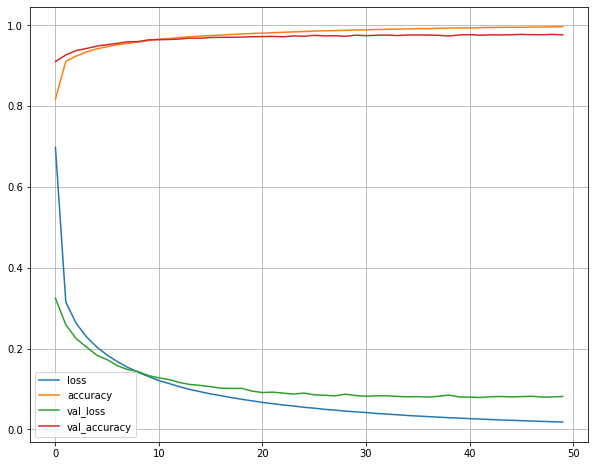

In [31]:
pd.DataFrame(history_func.history).plot(figsize = (10,8))
plt.grid()
plt.show()

In [32]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
y_pred_class = np.argmax(y_pred,axis=1)

In [34]:
precision_score(y_test,y_pred_class,average='macro')

0.9704722878593257

#### MNIST CLASSIFICATION USING CNN

In [35]:
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [37]:
X_train_full = X_train_full.reshape(-1,28,28,1)
y_train_full = to_categorical(y_train_full)

In [38]:
X_train,X_valid = X_train_full[:50000]/255.0,X_train_full[50000:]/255.0 # we normalizing the pixel values btw 0 and 1
y_train,y_valid= y_train_full[:50000],y_train_full[50000:]

In [41]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [42]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)        

In [44]:
history = model.fit(X_train,y_train,epochs=10,validation_data=[X_valid,y_valid],callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
1563/1563 [==============================] - 142s 89ms/step - loss: 0.1024 - accuracy: 0.9689 - val_loss: 0.0490 - val_accuracy: 0.9864
Epoch 2/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.0533 - accuracy: 0.9849 - val_loss: 0.0644 - val_accuracy: 0.9851
Epoch 3/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.0410 - accuracy: 0.9883 - val_loss: 0.0719 - val_accuracy: 0.9828
Epoch 4/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0405 - val_accuracy: 0.9903
Epoch 5/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0384 - val_accuracy: 0.9905
Epoch 6/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0336 - val_accuracy: 0.9920
Epoch 7/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0

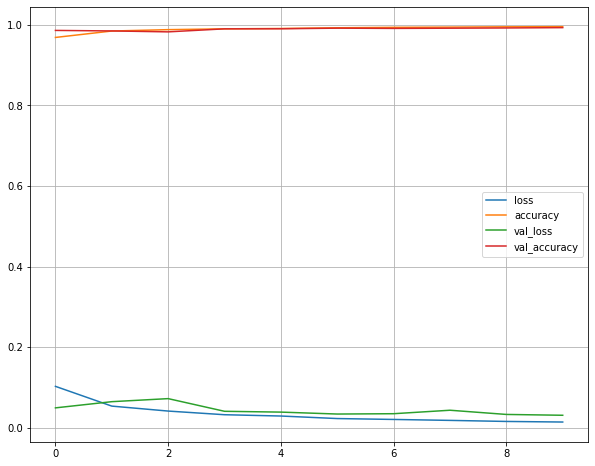

In [47]:
pd.DataFrame(history.history).plot(figsize = (10,8))
plt.grid()
plt.show()

313/313 [==============================] - 7s 23ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)